In [1]:
#conda list -e > requirements.txt

# Import Libraries

In [8]:
import cv2
import face_recognition
import glob
import matplotlib.pyplot as plt

# Prepare Dataset

In [9]:
image_encodings = []
persons = []

In [10]:
paths = glob.glob("D:\\Nourhan\\attendence_system_project\\1. Dataset\\*")
for path in paths:
    name = path.split("\\")[-1].split(".")[0]
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_encoding = face_recognition.face_encodings(rgb_img)[0]
    image_encodings.append(img_encoding)
    persons.append(name)

In [20]:
def detect_known_faces(img, image_encodings = image_encodings, persons = persons):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fc = []
    fn = []
    face_locations = face_recognition.face_locations(rgb_img)
    face_encodings = face_recognition.face_encodings(rgb_img, face_locations)
    for face_encoding,face_location in zip(face_encodings,face_locations):
        matches = face_recognition.compare_faces(image_encodings, face_encoding)
        name = "Unknown"
        if True in matches:
            first_match_index = matches.index(True)
            name = persons[first_match_index]
        fc.append(face_location)
        fn.append(name)
    return fc,fn

[(101, 87, 163, 24), (38, 179, 113, 104)] ['Jackie Chan', 'will Smith']


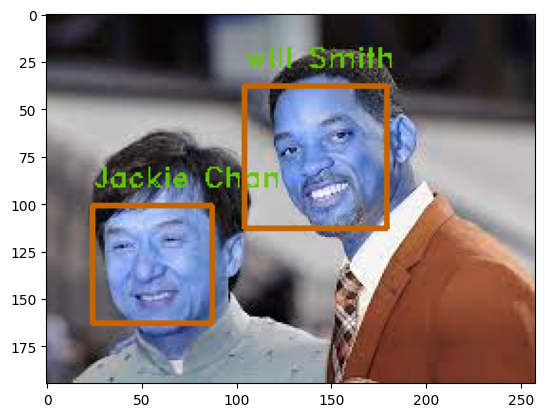

In [12]:
frame = cv2.imread("D:\\Nourhan\\attendence_system_project\\download.jpeg")
face_locations, face_names = detect_known_faces(frame)
print(face_locations, face_names)
for face_loc, name in zip(face_locations, face_names):
    y1, x2, y2, x1 = face_loc
    cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (100, 200, 0), 1)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (200, 100, 0), 2)
    #cv2.imshow("Frame", frame)
    plt.imshow(frame)

# Face recognition with camera

In [7]:
# Load Camera
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    # Detect Faces
    face_locations, face_names = detect_known_faces(frame)
    for face_loc, name in zip(face_locations, face_names):
        y1, x2, y2, x1 = face_loc
        cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)
        cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)
    if key == 27 or key == ord('q'):
        break
cv2.destroyAllWindows()
cap.release()

# Save Encodings and names in file

In [15]:
image_encodings[0]

array([-0.09382541,  0.03073776,  0.06115437,  0.02006713,  0.00157091,
       -0.03459632, -0.02575206, -0.112887  ,  0.13377613, -0.06814084,
        0.20266688, -0.03160055, -0.11465591, -0.0782664 , -0.02798632,
        0.10108041, -0.12197316, -0.08726692, -0.11040173, -0.05838557,
       -0.01159413,  0.0543011 ,  0.00952858, -0.02160678, -0.10952612,
       -0.28385383, -0.10548587, -0.08424755,  0.09768495,  0.02238996,
       -0.03608269,  0.00848023, -0.22133052, -0.12009479,  0.08739158,
        0.09828416, -0.04293601, -0.05911782,  0.15996318,  0.03743336,
       -0.19875358,  0.06160089, -0.00533523,  0.2794534 ,  0.23163958,
        0.03060813, -0.03846161, -0.12525527,  0.12279502, -0.13849141,
        0.08710682,  0.12567899,  0.12739836,  0.08951966,  0.04551288,
       -0.08653988,  0.02936071,  0.14975359, -0.12920804, -0.01108126,
        0.05699245, -0.05527971,  0.02457907, -0.08748568,  0.14389345,
        0.08181528, -0.09045108, -0.18408534,  0.11549931, -0.14

In [23]:
type(image_encodings[0])

numpy.ndarray

In [18]:
import pandas as pd
df = pd.DataFrame({"Persons":persons, "Encodings":image_encodings})
df.to_csv("D:\\Nourhan\\attendence_system_project\\5. Encodings\\encodings.csv", index=False)

In [19]:
saved_df = pd.read_csv("D:\\Nourhan\\attendence_system_project\\5. Encodings\\encodings.csv")
en = saved_df["Encodings"]
n = saved_df["Persons"]

# Test after saving Encodings

In [29]:
import numpy as np
e = []
for i in en:
    e.append(np.fromstring(i[1:-1], dtype=float, sep=' '))

In [31]:
type(e[0])

numpy.ndarray

[(101, 87, 163, 24), (38, 179, 113, 104)] ['Jackie Chan', 'will Smith']


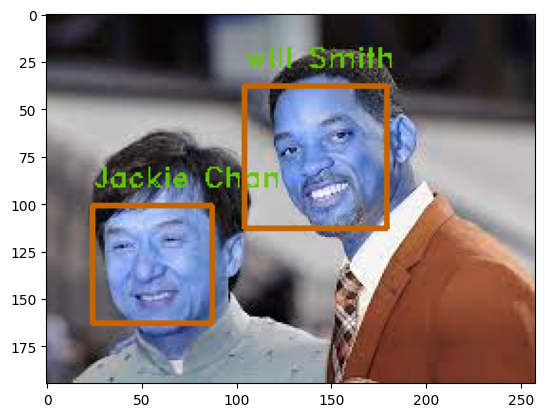

In [32]:
frame = cv2.imread("D:\\Nourhan\\attendence_system_project\\download.jpeg")
face_locations, face_names = detect_known_faces(frame, image_encodings = e, persons = n)
print(face_locations, face_names)
for face_loc, name in zip(face_locations, face_names):
    y1, x2, y2, x1 = face_loc
    cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (100, 200, 0), 1)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (200, 100, 0), 2)
    #cv2.imshow("Frame", frame)
    plt.imshow(frame)